<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/10_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10章 アンサンブル学習

アンサンブル学習で、breast\_cancerデータの識別を行います。

ライブラリの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

breast_cancerデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

可視化によって問題の難しさの検討をつけます。

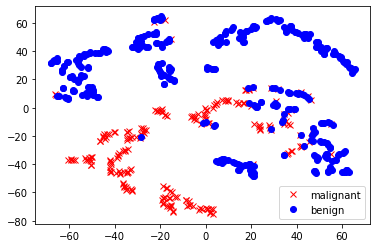

In [3]:
tsne = TSNE(perplexity=5)
X2 = tsne.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1], 'rx', label=bc.target_names[0])
plt.plot(X2[y==1,0], X2[y==1,1], 'bo', label=bc.target_names[1])
plt.legend()

## バギング

base_estimator引数で識別器を指定します。Noneの場合は決定木になります。

In [4]:
clf1 = ensemble.BaggingClassifier()
clf1.fit(X, y)

BaggingClassifier()

交差確認法で評価します。

In [5]:
scores = cross_val_score(clf1, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

95.26 +/- 7.19 %


## ランダムフォレスト

In [6]:
clf2 = ensemble.RandomForestClassifier(n_estimators=10)
clf2.fit(X,y)

RandomForestClassifier(n_estimators=10)

交差確認法で評価します。

In [7]:
scores = cross_val_score(clf2, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

95.08 +/- 7.81 %


## Adaブースト

In [8]:
clf3 = ensemble.AdaBoostClassifier()
clf3.fit(X,y)

AdaBoostClassifier()

交差確認法で評価します。

In [9]:
scores = cross_val_score(clf3, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

96.13 +/- 5.62 %


## 勾配ブースティング

In [10]:
clf4 = ensemble.GradientBoostingClassifier()
clf4.fit(X,y)

GradientBoostingClassifier()

交差確認法で評価します。

In [11]:
scores = cross_val_score(clf4, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() *200))

96.14 +/- 5.83 %


### 補足

各特徴の重要性を確認するコード

Feature ranking:
1. worst radius (0.439899)
2. worst perimeter (0.152091)
3. mean concave points (0.129907)
4. worst concave points (0.119642)
5. worst texture (0.036875)
6. worst area (0.029486)
7. mean texture (0.027098)
8. worst concavity (0.012139)
9. concavity error (0.009388)
10. area error (0.008341)
11. worst smoothness (0.007102)
12. concave points error (0.004437)
13. texture error (0.004058)
14. compactness error (0.002754)
15. perimeter error (0.002743)
16. radius error (0.002343)
17. symmetry error (0.002262)
18. mean compactness (0.001964)
19. fractal dimension error (0.001521)
20. mean symmetry (0.001434)
21. mean perimeter (0.000906)
22. smoothness error (0.000751)
23. worst compactness (0.000707)
24. mean area (0.000647)
25. mean fractal dimension (0.000469)
26. worst fractal dimension (0.000278)
27. mean concavity (0.000225)
28. mean radius (0.000205)
29. mean smoothness (0.000173)
30. worst symmetry (0.000154)


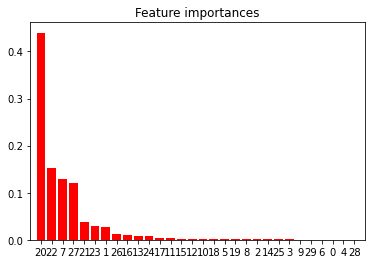

In [12]:
importances = clf4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, bc.feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

次にカテゴリ特徴を含んだcredit-gデータの識別を行います。credit-gデータの解説は、教科書p.263を参照してください。

credit-gデータをpandasのDataFrame形式で読み込んでX, yに格納後、概要を表示します。

In [13]:
from sklearn.datasets import fetch_openml
ds = fetch_openml('credit-g', version = 'active', as_frame=True)
X = ds.data
y = ds.target
print(ds.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Perso

Xの中身を確認します。

In [14]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


カテゴリ特徴をone-hotに変換します。

In [15]:
X = pd.get_dummies(X)

正解の値はyes, noなので、これを数値に変換

In [16]:
enc = LabelEncoder()
y = enc.fit_transform(y)

データの可視化

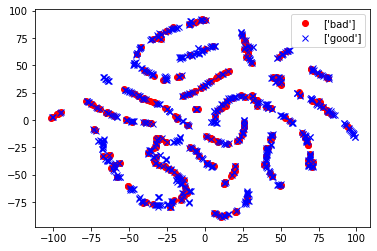

In [17]:
tsne = TSNE(perplexity=5)
X2 = tsne.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1], 'ro', label=enc.inverse_transform([0]))
plt.plot(X2[y==1,0], X2[y==1,1], 'bx', label=enc.inverse_transform([1]))
plt.legend()

バギング

In [18]:
clf1 = ensemble.BaggingClassifier(n_estimators=20)
scores = cross_val_score(clf1, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.73 (+/- 0.08)


ランダムフォレスト

In [19]:
clf2 = ensemble.RandomForestClassifier(n_estimators=80)
scores = cross_val_score(clf2, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.76 (+/- 0.06)


AdaBoost

In [20]:
clf3 = ensemble.AdaBoostClassifier(n_estimators=30)
scores = cross_val_score(clf3, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.74 (+/- 0.07)


勾配ブースティング

In [21]:
clf4 = ensemble.GradientBoostingClassifier(n_estimators=100)
scores = cross_val_score(clf4, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.76 (+/- 0.09)


## 課題

アンサンブル学習でbostonデータの回帰を行い、各特徴の重要性を確認してください。